In [2]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA as PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)


In [18]:
print(X_r)

[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]
 [-2.28085963e+00  7.41330449e-01  1.68677658e-01  2.42008576e-02]
 [-2.82053775e+00 -8.94613845e-02  2.57892158e-01  4.81431065e-02]
 [-2.62614497e+00  1.63384960e-01 -2.18793179e-02  4.52978706e-02]
 [-2.88638273e+00 -5.78311754e-01  2.07595703e-02  2.67447358e-02]
 [-2.67275580e+00 -1.13774246e-01 -1.97632725e-01  5.62954013e-02]
 [-2.50694709e+00  6.45068899e-01 -7.53180094e-02  1.50199245e-02]
 [-2.61275523e+00  1.47299392e-02  1.02150260e-01  1.56379208e-01]
 [-2.78610927e+00 -2.35112000e-01 -2.06844430e-01  7.88791149e-03]
 [-3.22380374e+00 -5.11394587e-01  6.12996725e-02  2.16798118e-02]
 [-2.64475039e+00  1.17876464e+00 -1.51627524e-01 -1.59209718e

In [15]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'% str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [0.92461872 0.05306648]


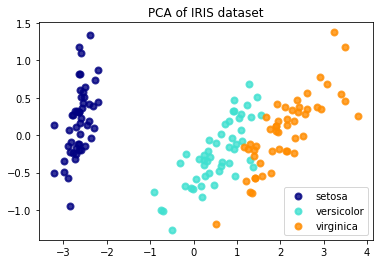

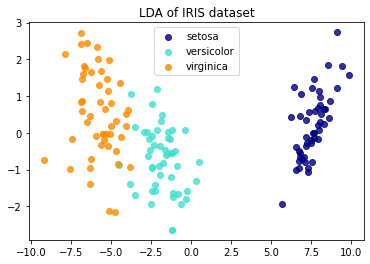

In [8]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

In [39]:
clf = LLE(n_neighbors=149, n_components=2, method='standard') 

X_lle = clf.fit(X).transform(X) 
#print(X_lle)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)

[[-0.10714307 -0.04960797]
 [-0.10769641  0.02891978]
 [-0.11451246  0.0238033 ]
 [-0.1085639   0.05187032]
 [-0.10884157 -0.05056864]
 [-0.09166217 -0.11767407]
 [-0.11172227  0.01490597]
 [-0.10461396 -0.02461592]
 [-0.11374885  0.09244569]
 [-0.10616579  0.01989992]
 [-0.10065266 -0.1013387 ]
 [-0.10378146 -0.0005551 ]
 [-0.1104676   0.03879504]
 [-0.12716737  0.08125486]
 [-0.10691899 -0.18582609]
 [-0.09662055 -0.2118281 ]
 [-0.10533326 -0.1288992 ]
 [-0.10566379 -0.04909374]
 [-0.08885237 -0.13843477]
 [-0.10346049 -0.08065256]
 [-0.09259982 -0.06095192]
 [-0.10157582 -0.06866798]
 [-0.12766481 -0.02042754]
 [-0.09162957 -0.01605158]
 [-0.09351994  0.00862637]
 [-0.0995669   0.02455743]
 [-0.09823371 -0.02056541]
 [-0.10243225 -0.05722136]
 [-0.10544352 -0.04864185]
 [-0.10426059  0.03300024]
 [-0.10256081  0.03404163]
 [-0.09647584 -0.06584156]
 [-0.10633193 -0.12646403]
 [-0.10478537 -0.17171265]
 [-0.10468667  0.0204683 ]
 [-0.11404906 -0.0105556 ]
 [-0.10537959 -0.09460225]
 

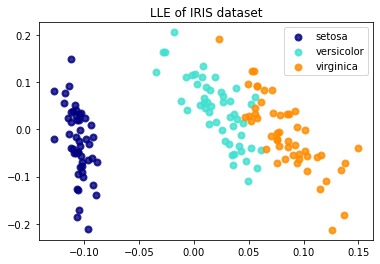

In [40]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lle[y == i, 0], X_lle[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LLE of IRIS dataset')

plt.show()

#with different k, we can get different plot, and when k =1-5 The near-neighbour range is too small and the same disconnection occurs.
#So we choose K = 149